<a href="https://colab.research.google.com/github/trianggadios/uas-ai/blob/main/Voice_Model_by_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
from google.colab import drive

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

import matplotlib.pyplot as plt
import numpy as np

import pandas

import librosa
import librosa.feature
import librosa.display

import warnings

warnings.simplefilter("ignore")

# Mounting Google Drive

In [ ]:
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/Dataset

Mounted at /content/gdrive
/content/gdrive/MyDrive/Dataset


# Merge Dataframe

In [ ]:
df_train = pandas.read_csv('suara/cv-corpus-6.1-2020-12-11/id/train.tsv', sep='\t')
df_train = df_train.drop(['client_id', 'sentence', 'up_votes', 'down_votes', 'age', 'accent', 'locale', 'segment'], axis=1)
df_train.dropna(subset=['gender'], inplace=True)
df_train.head()

,path,gender
0,common_voice_id_19192526.mp3,male
1,common_voice_id_19192527.mp3,male
2,common_voice_id_19192528.mp3,male
3,common_voice_id_19192535.mp3,male
4,common_voice_id_19192536.mp3,male


In [ ]:
df_dev = pandas.read_csv('suara/cv-corpus-6.1-2020-12-11/id/dev.tsv', sep='\t')
df_dev = df_dev.drop(['client_id', 'sentence', 'up_votes', 'down_votes', 'age', 'accent', 'locale', 'segment'], axis=1)
df_dev.dropna(subset=['gender'], inplace=True)
df_dev.head()

,path,gender
0,common_voice_id_20953537.mp3,male
1,common_voice_id_20953540.mp3,male
2,common_voice_id_20953541.mp3,male
3,common_voice_id_20953542.mp3,male
4,common_voice_id_20953586.mp3,male


In [ ]:
df_other = pandas.read_csv('suara/cv-corpus-6.1-2020-12-11/id/other.tsv', sep='\t')
df_other = df_other.drop(['client_id', 'sentence', 'up_votes', 'down_votes', 'age', 'accent', 'locale', 'segment'], axis=1)
df_other.dropna(subset=['gender'], inplace=True)
df_other.head()

,path,gender
0,common_voice_id_20953008.mp3,male
1,common_voice_id_20953079.mp3,female
2,common_voice_id_20953185.mp3,male
3,common_voice_id_20953213.mp3,female
4,common_voice_id_20953224.mp3,female


In [ ]:
df_validated = pandas.read_csv('suara/cv-corpus-6.1-2020-12-11/id/validated.tsv', sep='\t')
df_validated = df_validated.drop(['client_id', 'sentence', 'up_votes', 'down_votes', 'age', 'accent', 'locale', 'segment'], axis=1)
df_validated.dropna(subset=['gender'], inplace=True)
df_validated.head()

,path,gender
10,common_voice_id_20953397.mp3,male
23,common_voice_id_22072068.mp3,other
24,common_voice_id_22072073.mp3,other
30,common_voice_id_20483312.mp3,female
31,common_voice_id_20483313.mp3,female


In [ ]:
# df = pandas.concat([df_train, df_validated, df_other, df_dev])
df = df_train
df.count

<bound method DataFrame.count of                               path gender
0     common_voice_id_19192526.mp3   male
1     common_voice_id_19192527.mp3   male
2     common_voice_id_19192528.mp3   male
3     common_voice_id_19192535.mp3   male
4     common_voice_id_19192536.mp3   male
...                            ...    ...
2125  common_voice_id_21023524.mp3   male
2126  common_voice_id_21023592.mp3   male
2127  common_voice_id_21023604.mp3   male
2128  common_voice_id_21023654.mp3   male
2129  common_voice_id_21023818.mp3   male

[2020 rows x 2 columns]>

# Displaying Spectrum Audio 2 Sample Data (Male and Female)

In [ ]:
def display_spectrum_of_frequency(audio_path):
  x, sr = librosa.load(audio_path)
  mfcc = librosa.feature.mfcc(x)
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(mfcc, x_axis='time', y_axis='hz')
  plt.colorbar()
  plt.title(audio_path)
  plt.tight_layout()
  plt.show()

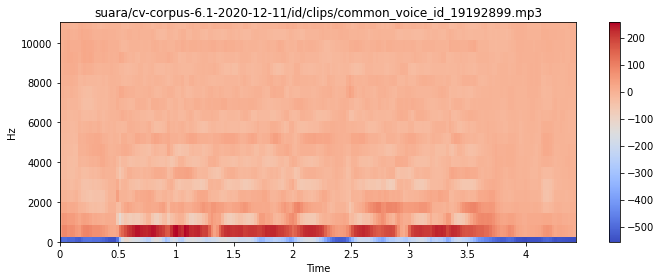

In [ ]:
# Male
display_spectrum_of_frequency('suara/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_19192899.mp3')

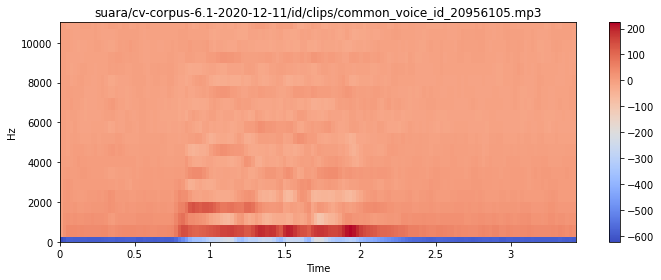

In [ ]:
#Female
display_spectrum_of_frequency('suara/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_20956105.mp3')

# Extract Feature Audio 1 Sample Data

In [ ]:
def extract_feature_song(audio_path):
  x, sr = librosa.load(audio_path)
  mfcc = librosa.feature.mfcc(x)
  mfcc = mfcc/np.amax(np.absolute(mfcc))
  # return len(np.ndarray.flatten(mfcc))
  return np.ndarray.flatten(mfcc)[:1000]

In [ ]:
extract_feature_song('suara/cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_20956105.mp3')

array([-1.00000000e+00, -9.67193425e-01, -9.39373553e-01, -9.38661575e-01,
       -9.43878829e-01, -9.44456339e-01, -9.43963468e-01, -9.46269214e-01,
       -9.49642599e-01, -9.48384345e-01, -9.51090574e-01, -9.50304806e-01,
       -9.43884254e-01, -9.37795460e-01, -9.31472063e-01, -9.31470752e-01,
       -9.41961169e-01, -9.41475630e-01, -9.37037766e-01, -9.34694290e-01,
       -9.32766974e-01, -9.35017705e-01, -9.47426081e-01, -9.47689950e-01,
       -9.40512717e-01, -9.43524718e-01, -9.46703970e-01, -9.47250009e-01,
       -9.43915069e-01, -9.40173745e-01, -9.41883147e-01, -9.42395389e-01,
       -9.38939452e-01, -9.09189582e-01, -8.43809187e-01, -7.93899596e-01,
       -7.38502800e-01, -6.43724263e-01, -5.90509713e-01, -5.81724584e-01,
       -5.77150643e-01, -5.52813172e-01, -5.03315032e-01, -4.60889071e-01,
       -4.49185789e-01, -4.31320131e-01, -3.97528380e-01, -3.74603778e-01,
       -3.56058031e-01, -3.85026097e-01, -4.88534778e-01, -5.67774773e-01,
       -5.93944848e-01, -

# Generate Features and Labels

In [ ]:
all_features = []
all_labels = []

for gender in df['gender'].unique():
  new_df = df[df['gender'] == gender]
  print(f'Processing {new_df.shape[0]} voices in {gender} gender')
  for index, row in new_df.iterrows():
    audio_path = f'suara/cv-corpus-6.1-2020-12-11/id/clips/{row["path"]}'
    features = extract_feature_song(audio_path)
    all_features.append(features)
    all_labels.append(gender)

Processing 1913 voices in male gender
Processing 107 voices in female gender


In [ ]:
label_unique_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
label_row_ids = label_row_ids.astype(np.int32, copy=False)
one_hot_labels = to_categorical(label_row_ids, len(label_unique_ids))

features, labels = all_features, one_hot_labels

# Split Data (Train & Test)

In [ ]:
all_data = np.column_stack((features, labels))
np.random.shuffle(all_data)

splitidx = int(len(all_data)*0.8)
train, test = all_data[:splitidx:], all_data[splitidx:, :]

In [ ]:
train_input = train[:, :-2]
train_label = train[:, -2:]

In [ ]:
test_input = test[:, :-2]
test_label = test[:, -2:]

# Training Data

In [ ]:
models = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    Dense(2),
    Activation('softmax')
])

In [ ]:
models.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               100100    
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 100,302
Trainable params: 100,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
models.fit(
    train_input,
    train_label,
    epochs=100,
    batch_size=32,
)

Epoch 1/100
51/51 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.9143
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9507
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9578
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9590
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9663
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9681
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9746
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9811
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9867
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9888
Epoch 11/

# Evaluate Model

In [ ]:
result_models = models.evaluate(
    test_input,
    test_label,
    batch_size=32
)
print(f'Loss: {result_models[0]}')
print(f'Accuracy: {result_models[1]}')

13/13 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9604
Loss: 0.2993667423725128
Accuracy: 0.9603960514068604


# Predict Test Case

In [ ]:
def position_test_label(position):
  return {
      0: 'male',
      1: 'female',
      2: 'other'
  }.get(position, None)

for index, test_data in enumerate(test_input):
  if index == 100:
    break

  print(f'Test case: {index+1}')

  print(f'Test Label: {position_test_label(np.where(test_label[index] == 1)[0][0])}')
  print(test_label[index])

  result_predict = models.predict(np.reshape(test_data, (1, 1000)))[0]
  print('### Model Predict ###')
  print(f'Male: {round(result_predict[0]*100, 5)}%')
  print(f'Female: {round(result_predict[1]*100, 5)}%')
  # print(f'Other: {round(result_predict[2]*100, 5)}%')
  print('')

Test case: 1
Test Label: female
[0. 1.]
### Model Predict ###
Male: 4e-05%
Female: 99.99995%

Test case: 2
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 3
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.13784%
Female: 99.86216%

Test case: 4
Test Label: female
[0. 1.]
### Model Predict ###
Male: 1e-05%
Female: 99.99999%

Test case: 5
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.08669%
Female: 99.91331%

Test case: 6
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 7
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 8
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 9
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.00974%
Female: 99.99026%

Test case: 10
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.00019%
Female: 99.99981%

Test case: 11
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.

# Save Features and Labels in csv

In [ ]:
crot = pandas.DataFrame(features)
crot.count

<bound method DataFrame.count of            0         1         2    ...       997       998       999
0    -1.000000 -0.999927 -0.990635  ...  0.065495  0.077936  0.064633
1    -1.000000 -0.980417 -0.970061  ... -0.020860 -0.004576  0.004736
2    -1.000000 -0.999494 -0.994342  ... -0.003988 -0.009663 -0.000875
3    -1.000000 -0.986502 -0.978293  ... -0.013253 -0.016645 -0.007861
4    -0.999421 -0.961922 -0.945358  ... -0.031050  0.023219  0.058409
...        ...       ...       ...  ...       ...       ...       ...
2015 -1.000000 -0.999927 -0.998648  ...  0.050106  0.048288  0.044139
2016 -1.000000 -0.999748 -0.997763  ...  0.023032 -0.043417 -0.051203
2017 -1.000000 -1.000000 -1.000000  ...  0.000000  0.000000  0.000000
2018 -1.000000 -0.868131 -0.786755  ...  0.065605  0.062077  0.054545
2019 -1.000000 -0.827748 -0.733236  ... -0.038574 -0.037743 -0.043885

[2020 rows x 1000 columns]>

In [ ]:
crot.to_csv('ok.csv', index=False)

In [ ]:
crot_labels = pandas.DataFrame(labels)
crot_labels.count
crot_labels.to_csv('labels.csv', index=False)

# Save Model

In [ ]:
models.save_weights('gender_voice_model_full_data_v1.h5')

# Load Model

In [ ]:
loaded_models = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    Dense(2),
    Activation('softmax')
])

In [ ]:
loaded_models.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
loaded_models.load_weights('gender_voice_model_full_data_v1.h5')

In [ ]:
result_models = loaded_models.evaluate(
    test_input,
    test_label,
    batch_size=32
)
print(f'Loss: {result_models[0]}')
print(f'Accuracy: {result_models[1]}')

13/13 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.9442
Loss: 0.2993667423725128
Accuracy: 0.9603960514068604


In [ ]:
def position_test_label(position):
  return {
      0: 'male',
      1: 'female',
      2: 'other'
  }.get(position, None)

for index, test_data in enumerate(test_input):
  if index == 100:
    break

  print(f'Test case: {index+1}')

  print(f'Test Label: {position_test_label(np.where(test_label[index] == 1)[0][0])}')
  print(test_label[index])

  result_predict = models.predict(np.reshape(test_data, (1, 1000)))[0]
  print('### Model Predict ###')
  print(f'Male: {round(result_predict[0]*100, 5)}%')
  print(f'Female: {round(result_predict[1]*100, 5)}%')
  # print(f'Other: {round(result_predict[2]*100, 5)}%')
  print('')

Test case: 1
Test Label: female
[0. 1.]
### Model Predict ###
Male: 4e-05%
Female: 99.99995%

Test case: 2
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 3
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.13784%
Female: 99.86216%

Test case: 4
Test Label: female
[0. 1.]
### Model Predict ###
Male: 1e-05%
Female: 99.99999%

Test case: 5
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.08669%
Female: 99.91331%

Test case: 6
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 7
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 8
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.0%
Female: 100.0%

Test case: 9
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.00974%
Female: 99.99026%

Test case: 10
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.00019%
Female: 99.99981%

Test case: 11
Test Label: female
[0. 1.]
### Model Predict ###
Male: 0.